In [1]:
import pyodbc    
from dotenv import dotenv_values
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpathes
import matplotlib.dates as mdates
import seaborn as sns 
import plotly.express as px
import ipywidgets as widgets 
from IPython.display import display 
import plotly.graph_objects as go 
import datetime as dt 
import squarify

from scipy.stats import f_oneway 
from datetime import datetime 
from datetime import date 

from category_encoders import BinaryEncoder 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error










In [3]:
# Loading environment variables from .env file
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the .env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Creating a connection string
connection_string = f"DRIVER={{SQL Server}}; \
                    SERVER={server}; \
                    DATABASE={database}; \
                    UID={username}; \
                    PWD={password};"

# Connecting to the server
connection = pyodbc.connect(connection_string)

In [4]:
# Loading First dataset 3000 records
first_data = pd.read_sql_query(
    "SELECT * FROM dbo.oil", connection)

# Saving the DataFrame to a CSV file
first_data.to_csv('oil.csv', index=False)

first_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [5]:
# Loading First dataset 3000 records
second_data = pd.read_sql_query(
    "SELECT * FROM dbo.holidays_events", connection)

# Saving the DataFrame to a CSV file
second_data.to_csv('holidays_events.csv', index=False)

second_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
# Loading First dataset 3000 records
third_data = pd.read_sql_query(
    "SELECT * FROM dbo.stores", connection)

# Saving the DataFrame to a CSV file
third_data.to_csv('stores.csv', index=False)

third_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
#loading all datasets

holiday = pd.read_csv('holidays_events.csv',index_col= ["date"],parse_dates= ["date"])
oil = pd.read_csv('oil.csv',parse_dates= ['date'])
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv',index_col= ["date"],parse_dates= ["date"])
train = pd.read_csv('train.csv',index_col= ["date"],parse_dates=["date"])
transactions = pd.read_csv('transactions.csv',index_col= ["date"],parse_dates=["date"])
sample_submission = pd.read_csv('sample_submission.csv')
holiday



,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


## Exploratory Data Analysis: EDA

### Questions

#### 1. Is the train dataset complete (has all the required dates)?

#### 2. Which dates have the lowest and highest sales for each year?

#### 3. Did the earthquake impact sales?

#### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

#### 5. Are sales affected by promotions, oil prices and holidays?



### Hypothesis

##### Null Hypothesis:  Holidays do not affect the unit store sales
##### Alternate Hypothesis:  Holidays affect the sales in the store sales

### Data Overview
Here, the following were checked:<br>
* The shape of all the datasets
* The datatypes of the columns in the datasets
* Summary statistics
* Missing values

In [8]:
#Print out the shapes of the datasets

print(f"The shape of the holiday dataset is: {holiday.shape}")
print(f"The shape of the oil dataset is: {oil.shape}")
print(f"The shape of the stores dataset is: {stores.shape}")
print(f"The shape of the test dataset is: {test.shape}")
print(f"The shape of the test dataset is: {test.shape}")
print(f"The shape of the train dataset is: {train.shape}")
print(f"The shape of the transaction is: {transactions.shape}")

The shape of the holiday dataset is: (350, 5)
The shape of the oil dataset is: (1218, 2)
The shape of the stores dataset is: (54, 5)
The shape of the test dataset is: (28512, 4)
The shape of the test dataset is: (28512, 4)
The shape of the train dataset is: (3000888, 5)
The shape of the transaction is: (83488, 2)


In [9]:
# Printing the datatypes of each dataset

def show_datatype(dataset_name,dataset):
    print(f"Data types for {dataset_name}:")
    print(dataset.dtypes)
    print('_'*50)

show_datatype('Stores', stores)
show_datatype('Train', train)
show_datatype('Test', test)
show_datatype('Transactions', transactions)
show_datatype('Oil', oil)
show_datatype('Holiday', holiday)
show_datatype('Sample_Submission', sample_submission)

Data types for Stores:
store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object
__________________________________________________
Data types for Train:
id               int64
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
__________________________________________________
Data types for Test:
id              int64
store_nbr       int64
family         object
onpromotion     int64
dtype: object
__________________________________________________
Data types for Transactions:
store_nbr       int64
transactions    int64
dtype: object
__________________________________________________
Data types for Oil:
date          datetime64[ns]
dcoilwtico           float64
dtype: object
__________________________________________________
Data types for Holiday:
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
_______

In [10]:
# checking for the summaryof the datasets:
datasets = {'holiday': holiday, 'oil':oil,'stores': stores,'Train':train,'test':test, 'transactions': transactions,'sample_submission':sample_submission}

for name,data in datasets.items():
    print(f"\n {name.capitalize()} datasets summary statistics:\n")
    print(data.describe())
    print('_'*50)


 Holiday datasets summary statistics:

           type    locale locale_name description transferred
count       350       350         350         350         350
unique        6         3          24         103           2
top     Holiday  National     Ecuador    Carnaval       False
freq        221       174         174          10         338
__________________________________________________

 Oil datasets summary statistics:

                      date   dcoilwtico
count                 1218  1175.000000
mean   2015-05-02 12:00:00    67.714366
min    2013-01-01 00:00:00    26.190001
25%    2014-03-03 06:00:00    46.405001
50%    2015-05-02 12:00:00    53.189999
75%    2016-06-30 18:00:00    95.660000
max    2017-08-31 00:00:00   110.620003
std                    NaN    25.630476
__________________________________________________

 Stores datasets summary statistics:

       store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
m

In [11]:
datasets = {'holiday': holiday, 'oil':oil,'stores': stores,'Train':train,'test':test, 'transactions': transactions,'sample_submission':sample_submission}

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in {name} dataset:")
        print(data.isnull().sum())
        print('_'*50)

show_missing_values(datasets)

Missing values in holiday dataset:
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
__________________________________________________
Missing values in oil dataset:
date           0
dcoilwtico    43
dtype: int64
__________________________________________________
Missing values in stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
__________________________________________________
Missing values in Train dataset:
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
__________________________________________________
Missing values in test dataset:
id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64
__________________________________________________
Missing values in transactions dataset:
store_nbr       0
transactions    0
dtype: int64
__________________________________________________
Missing values in sample_sub

#### Comment:
* Missing data was found in the oil datasets.

#### Approach:
* The missing data were to be replaced by the mean value per month.<br> The rationale was to represent the missing values properly by the values over the month period.


In [12]:
# Ensure 'date' column is in datetime format
oil['date'] = pd.to_datetime(oil['date'])

# Loop through each year and month to fill NaN values with the mean
for year in range(2013, 2023):
    for month in range(1, 13):
        # Create the mask for the current year and month
        mask = (oil['date'].dt.month == month) & (oil['date'].dt.year == year)
        
        # Calculate the mean of 'dcoilwtico' for the current year and month
        mean = oil.loc[mask, 'dcoilwtico'].mean()
        
        # Fill NaN values with the calculated mean
        oil.loc[mask, 'dcoilwtico'] = oil.loc[mask, 'dcoilwtico'].fillna(mean)


In [13]:

# printing the missing values in the dataset again to confirm there are no missing values left

print(oil.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


## Merging Datasets

In [14]:
merge_data1 = pd.merge(train,transactions, how = 'outer', on = ['date','store_nbr'])
merge_data2 = pd.merge(merge_data1, holiday, how = 'outer', on = ['date'])
merge_data3 = pd.merge(merge_data2, oil, how = 'outer', on = ['date'])
merge_data = pd.merge(merge_data3, stores, how = 'outer', on = ['store_nbr'])
merge_data

,date,id,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,0.0,1.0,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
1,2013-01-01,1.0,1.0,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
2,2013-01-01,2.0,1.0,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
3,2013-01-01,3.0,1.0,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
4,2013-01-01,4.0,1.0,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054422,2017-12-22,NaN,NaN,NaN,NaN,NaN,NaN,Additional,National,Ecuador,Navidad-3,False,NaN,NaN,NaN,NaN,NaN
3054423,2017-12-23,NaN,NaN,NaN,NaN,NaN,NaN,Additional,National,Ecuador,Navidad-2,False,NaN,NaN,NaN,NaN,NaN
3054424,2017-12-24,NaN,NaN,NaN,NaN,NaN,NaN,Additional,National,Ecuador,Navidad-1,False,NaN,NaN,NaN,NaN,NaN
3054425,2017-12-25,NaN,NaN,NaN,NaN,NaN,NaN,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN,NaN


In [15]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054427 entries, 0 to 3054426
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   id            float64       
 2   store_nbr     float64       
 3   family        object        
 4   sales         float64       
 5   onpromotion   float64       
 6   transactions  float64       
 7   type_x        object        
 8   locale        object        
 9   locale_name   object        
 10  description   object        
 11  transferred   object        
 12  dcoilwtico    float64       
 13  city          object        
 14  state         object        
 15  type_y        object        
 16  cluster       float64       
dtypes: datetime64[ns](1), float64(7), object(9)
memory usage: 396.2+ MB


##### Renaming Columns

* Two columns had to be renamed. 
* 'type_x' column was changed to holiday_type
* 'type_y' column was changed to store_type

In [16]:
merge_data = merge_data.rename(columns = {"type_x": "holiday_type","type_y" : "store_type"})
merge_data.head()

,date,id,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,2013-01-01,0.0,1.0,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
1,2013-01-01,1.0,1.0,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
2,2013-01-01,2.0,1.0,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
3,2013-01-01,3.0,1.0,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0
4,2013-01-01,4.0,1.0,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756666,Quito,Pichincha,D,13.0


In [17]:
merge_data.describe().T

,count,mean,min,25%,50%,75%,max,std
date,3054427,2015-04-26 12:08:02.870011392,2012-03-02 00:00:00,2014-03-01 00:00:00,2015-04-28 00:00:00,2016-06-22 00:00:00,2017-12-26 00:00:00,NaN
id,3054348.0,1504276.775379,0.0,754676.75,1507571.5,2255120.25,3000887.0,866261.012008
store_nbr,3054348.0,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
sales,3054348.0,359.020892,0.0,0.0,11.0,196.011,124717.0,1107.285897
onpromotion,3054348.0,2.61748,0.0,0.0,0.0,0.0,741.0,12.254939
transactions,2805231.0,1697.071441,5.0,1046.0,1395.0,2081.0,8359.0,966.831652
dcoilwtico,2175837.0,67.919232,26.190001,46.529999,53.380001,95.610001,110.620003,25.6726
cluster,3054348.0,8.481481,1.0,4.0,8.5,13.0,17.0,4.649735


### Missing Values after Merging data

In [18]:
merge_data.isna().sum()

date                  0
id                   79
store_nbr            79
family               79
sales                79
onpromotion          79
transactions     249196
holiday_type    2551835
locale          2551835
locale_name     2551835
description     2551835
transferred     2551835
dcoilwtico       878590
city                 79
state                79
store_type           79
cluster              79
dtype: int64

##### Renaming Columns

* Two columns had to be renamed. 
* 'type_x' column was changed to holiday_type
* 'type_y' column was changed to store_type

In [19]:
# dropping missing values in sales
merge_data.dropna(subset = ["sales"], inplace = True)


In [20]:
merge_data['holiday_type'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [21]:
merge_data['holiday_type'].replace(np.nan,'Not Holiday',inplace = True)


In [22]:
merge_data.isna().sum()

date                  0
id                    0
store_nbr             0
family                0
sales                 0
onpromotion           0
transactions     249117
holiday_type          0
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       878526
city                  0
state                 0
store_type            0
cluster               0
dtype: int64

### Analysis

### 1. Is the train dataset complete (has all the required dates)?

In [23]:
# creating a date range from the from the first date to the last date in the series
date_range = pd.date_range(start = train.index.min(),end = train.index.max())

# Check if there are any dates in the range that are not in the index
missing_dates = date_range.difference(train.index)

if len(missing_dates) == 0:
    print("The time series is complete.")
else:
    print(f"The time series is not complete. The following dates are missing:\n {missing_dates}")


The time series is not complete. The following dates are missing:
 DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


### 2.  Which dates have the lowest and highest sales for each year?

In [24]:
merge_data['year'] = pd.to_datetime(merge_data['date']).dt.year 

#Group merge_data by year and date 
grouped_data = merge_data.groupby(['year','date'])

# Calculate total sales for each date
sales_by_date = grouped_data['sales'].sum()

# Putting everything in a dataframe 
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
lowest_sales = pd.DataFrame(sales_by_date.groupby('year').nsmallest(1))
highest_sales = pd.DataFrame(sales_by_date.groupby('year').nlargest(1))
highest_sales

,,,sales
year,year,date,
2013,2013,2013-12-22,"1,392,590.294"
2014,2014,2014-12-22,"2,016,286.692"
2015,2015,2015-12-22,"2,283,723.819"
2016,2016,2016-06-25,"2,580,890.505"
2017,2017,2017-06-25,"3,277,832.576"


In [25]:
# Group the merge_data by year and date, and calculate the minimum and maximum sales for each date 
sales_by_date = merge_data.groupby(['year','date'])['sales'].agg(['min','max'])

#Create a slide object 
slide = widgets.Output()

sales_by_date

#Loop through each year and plot the minimum and maximum sales for each date as two lines 
for year in sales_by_date.index.get_level_values('year').unique():
    data = sales_by_date.loc[year]
    fig, ax = plt.subplots(figsize = (8,2))
    ax.plot(data.index.get_level_values('date'), data['min'], label = f'Min Sales {year}')
    ax.plot(data.index.get_level_values('date'),data['max'],label = f'Max sales {year}')
    ax.set_title(f'Lowest and Highest Sales for {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    ax.legend()

    #Display the figure in the slide

    with slide:
        display(fig)
    plt.close(fig)


#Display the slide
display(slide)



Output()

#### Insights:
 * From 2013 to 2015, the highest sales have been recorded in December.
 * However, the trends changed in 2016 and 2017 where the highest sales were recorded in June.
 * Perhaps, more promotions were carried out in June as compared to December

### 3. Did the earthquake impact sales?

 A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [26]:
# merged_data[merged_date['date'] -- '2016-04-16']['sales'].sum()
date = '2016-04-16'
sales_sum = merge_data[merge_data['date'] == date]['sales'].sum()
print("The sales for the date {} is ${:,.2f}".format(date,sales_sum))

The sales for the date 2016-04-16 is $862,121.49


Text(0, 0.5, 'sales in Millions')

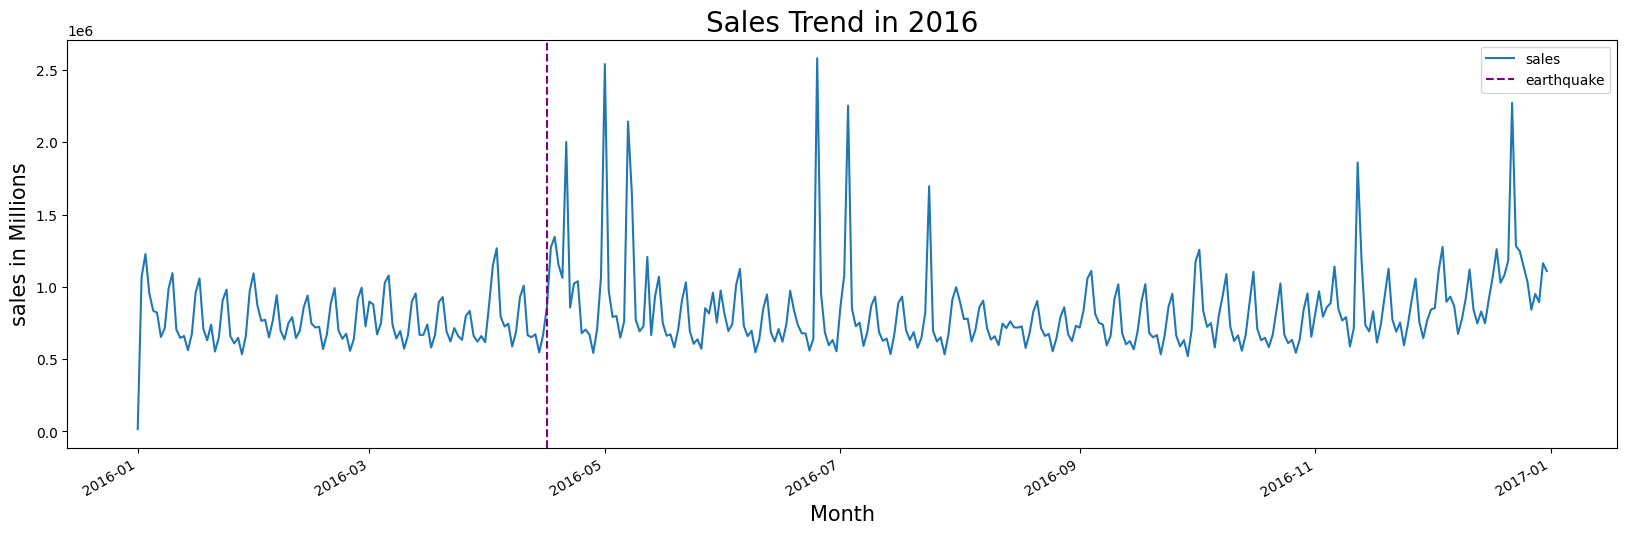

In [27]:
# define earthquake date 
earthquake = [pd.to_datetime('2016-04-16')]

#Obtain 2016 dataset
data16 = merge_data[merge_data['year'] == 2016]

#Plotting 
ax = data16.groupby(['date'],as_index = False)['sales'].sum().plot('date','sales',figsize = (20,6))
ax.axvline(earthquake, color = 'purple',linestyle = '--')
ax.legend(['sales','earthquake'])
plt.title('Sales Trend in 2016',fontsize = 20)
plt.xlabel('Month',fontsize = 15)
plt.ylabel('sales in Millions',fontsize = 15)

#### Insights
From the Graph:
* Sales were on a steady rise from previous weeks prior the earthquake.
* A few days after the earthquake, sales took a dip but rose steadily for about a week and suffered a major dip until May.
 


### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)



#### Collective grouping of cluster, city,state,type by transactions made

In [28]:
# Here, the stores and transactions  were merged to help analysis
merged = pd.merge(stores, transactions, on = 'store_nbr')

# group the merged dataset by cluster, city, state and type and calculate the sum of 
grouped = merged.groupby(['cluster','city','state','type'])['transactions'].sum()

grouped


cluster  city           state                           type
1        Daule          Guayas                          D        2485687
         Guayaquil      Guayas                          D        3568206
         Salinas        Santa Elena                     D        1520362
2        Cuenca         Azuay                           D        3284365
3        El Carmen      Manabi                          C        1451290
         Guayaquil      Guayas                          C        2236356
         Machala        El Oro                          C        2181195
         Playas         Guayas                          C        1123889
         Quevedo        Los Rios                        C        1743003
         Santo Domingo  Santo Domingo de los Tsachilas  C        1464498
4        Loja           Loja                            D        2867052
         Machala        El Oro                          D        1764146
         Santo Domingo  Santo Domingo de los Tsachilas  D      

### Group Transactions made by city


In [29]:
# Aggregate sales data by city 
sales_by_city = merged.groupby('city')['transactions'].sum().reset_index().sort_values(by = 'transactions',ascending = False)
sales_by_city

,city,transactions
18,Quito,70999057
8,Guayaquil,16546295
0,Ambato,6172615
3,Cuenca,5673847
21,Santo Domingo,4655266
2,Cayambe,3972488
13,Machala,3945341
10,Latacunga,3531356
12,Loja,2867052
4,Daule,2485687


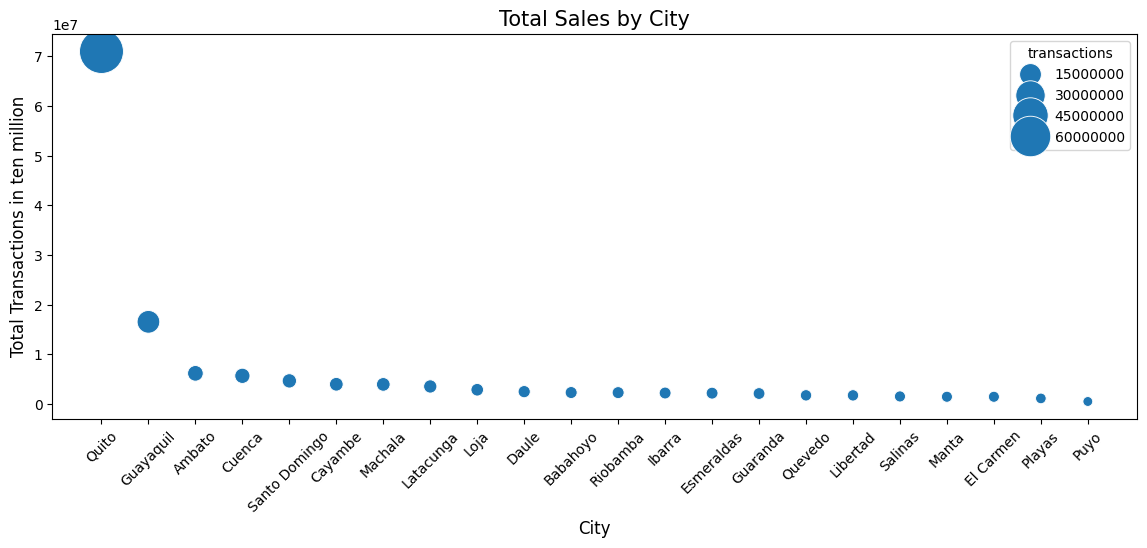

In [30]:
# Create bubble plot 
plt.figure(figsize = (14,5))
sns.scatterplot(x = 'city',y = 'transactions',size = 'transactions', sizes = (50,1000),data = sales_by_city,palette = 'Set2')
plt.title('Total Sales by City',fontsize = 15)
plt.xlabel('City',fontsize = 12)
plt.ylabel('Total Transactions in ten million',fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

#### Insights

* The City Quita recorded the highest sale transactions with Puyo recording the lowest

#### Group transactions by State

In [31]:
# Group merged dataset by state and sum transactions
state_transactions = merged.groupby('state')['transactions'].sum().reset_index().sort_values(by = 'transactions', ascending = False)
state_transactions

,state,transactions
12,Pichincha,74971545
6,Guayas,21894000
15,Tungurahua,6172615
0,Azuay,5673847
14,Santo Domingo de los Tsachilas,4655266
9,Los Rios,4049047
4,El Oro,3945341
3,Cotopaxi,3531356
10,Manabi,2906765
8,Loja,2867052


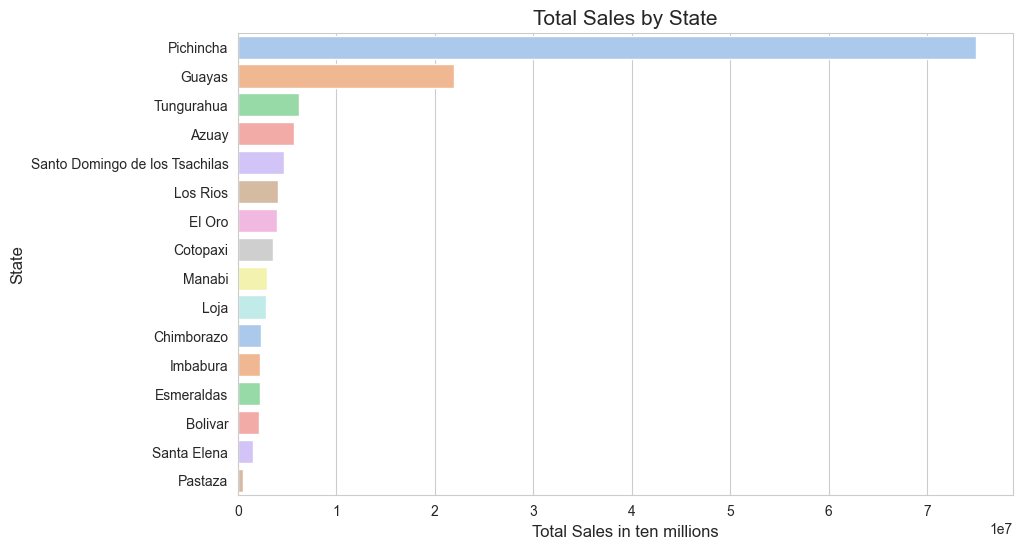

In [32]:
# Create a horizontal bar chart with Seaborn
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.barplot(data = state_transactions,x = 'transactions', y = 'state', palette = 'pastel' )
plt.title('Total Sales by State',fontsize = 15)
plt.xlabel('Total Sales in ten millions', fontsize = 12)
plt.ylabel('State',fontsize = 12)
plt.show()

#### Insights

The state with the highest sale transsactions is Pinchincha with Pastaza recording the lowest number of transactions

#### Group transactions by store

In [33]:
trans_store = merged.groupby('type')['transactions'].sum().reset_index()
trans_store

,type,transactions
0,A,43215470
1,B,20384902
2,C,24788958
3,D,46230088
4,E,6859527


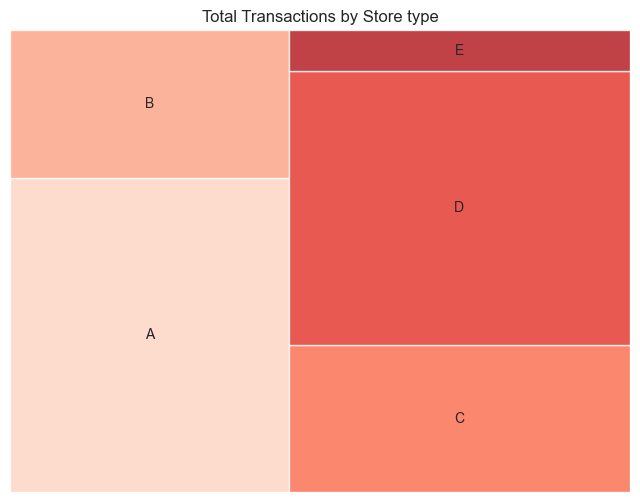

{'A': (0.9935870818915802, 0.8323414071510957, 0.7624913494809689),
 'B': (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 'C': (0.9835755478662053, 0.4127950788158401, 0.28835063437139563),
 'D': (0.8901960784313725, 0.18562091503267975, 0.15294117647058825),
 'E': (0.6943944636678201, 0.07003460207612457, 0.09231833910034601)}

In [34]:
# set up the color gradient
colors = sns.color_palette('Reds',len(trans_store))
color_map = dict(zip(trans_store['type'],colors))

#Create the treemap
fig,ax = plt.subplots(figsize = (8,6))
squarify.plot(sizes = trans_store['transactions'],label = trans_store['type'], alpha = 0.8,color = [color_map[type] for type in trans_store['type']])
plt.axis('off')
plt.title('Total Transactions by Store type')
plt.show()

color_map

#### Insights

The store type D was found to record the highest number of transactions

### 5. Are sales affected by promotions, oil prices and holidays?

#####  To properly evaluate the question above, a null hypothesis has to be formed 
##### The null hypothesis is given by: Sales are not affectd by promotions

In [35]:

# finding the the t-statistic and p value 
from scipy.stats import pearsonr
test_result = pearsonr(merge_data["sales"], merge_data["onpromotion"])
test_result


# defining the significance level

alpha = 0.05


# if p value less than alpha, then the null hypothesis is rejected

if test_result.pvalue  < alpha:
    print("The null hypothesis is rejected")
    print(f"At the {alpha} significance level, the data provide very strong evidence to conclude that sales are affected by promotion.")



The null hypothesis is rejected
At the 0.05 significance level, the data provide very strong evidence to conclude that sales are affected by promotion.


##### The next null hypothesis is given by: Sales are not affectd by oil prices

In [36]:
# finding the the t-statistic and p value 
from scipy.stats import pearsonr
merge_data = merge_data.dropna(subset = "dcoilwtico")
test_result = pearsonr(merge_data["sales"], merge_data["dcoilwtico"])
test_result

# defining the significance level

alpha = 0.05


# if p value less than alpha, then the null hypothesis is rejected

if test_result.pvalue  < alpha:
    print("The null hypothesis is rejected")
    print(f"At the {alpha} significance level, the data provide very strong evidence to conclude that sales are affected by sales.")
else:
    print('The null hypothesis is accepted')
    print(f"At the {alpha} significance level, the data provide very strong evidence to conclude that sales are not affected by oil prices .")




The null hypothesis is rejected
At the 0.05 significance level, the data provide very strong evidence to conclude that sales are affected by sales.


#### Hypothesis testing for holiday column using ANOVA test

In [37]:
holiday_list = merge_data.groupby('holiday_type')['sales'].apply(list)
Anova_results = f_oneway(*holiday_list)
print(Anova_results)




F_onewayResult(statistic=442.72899753125677, pvalue=0.0)


#### Insights
The p-value is less than the significant level 0.05 so we reject the null hypothesis. That is, holiday columns are correlated with the sales made. Thus, sales are affected by holidays

In [38]:
merge_data

,date,id,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,year
0,2013-01-01,0.000,1.000,AUTOMOTIVE,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.757,Quito,Pichincha,D,13.000,2013
1,2013-01-01,1.000,1.000,BABY CARE,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.757,Quito,Pichincha,D,13.000,2013
2,2013-01-01,2.000,1.000,BEAUTY,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.757,Quito,Pichincha,D,13.000,2013
3,2013-01-01,3.000,1.000,BEVERAGES,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.757,Quito,Pichincha,D,13.000,2013
4,2013-01-01,4.000,1.000,BOOKS,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.757,Quito,Pichincha,D,13.000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,"3,000,751.000",54.000,POULTRY,59.619,0.000,802.000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.570,El Carmen,Manabi,C,3.000,2017
3054344,2017-08-15,"3,000,752.000",54.000,PREPARED FOODS,94.000,0.000,802.000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.570,El Carmen,Manabi,C,3.000,2017
3054345,2017-08-15,"3,000,753.000",54.000,PRODUCE,915.371,76.000,802.000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.570,El Carmen,Manabi,C,3.000,2017
3054346,2017-08-15,"3,000,754.000",54.000,SCHOOL AND OFFICE SUPPLIES,0.000,0.000,802.000,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.570,El Carmen,Manabi,C,3.000,2017


## Feature Processing

In [39]:
# drop unnecessary columns
merge_data = merge_data.drop(columns = ['id','locale','locale_name','description','transferred'])


In [40]:
# drop columns for univariate analysis
merge_data1 = merge_data.drop(columns = ['store_nbr','family','onpromotion','transactions','city','dcoilwtico','holiday_type','cluster','year','store_type'])
merge_data1

,date,sales,state
0,2013-01-01,0.000,Pichincha
1,2013-01-01,0.000,Pichincha
2,2013-01-01,0.000,Pichincha
3,2013-01-01,0.000,Pichincha
4,2013-01-01,0.000,Pichincha
...,...,...,...
3054343,2017-08-15,59.619,Manabi
3054344,2017-08-15,94.000,Manabi
3054345,2017-08-15,915.371,Manabi
3054346,2017-08-15,0.000,Manabi


In [41]:
def getDateFeatures(df,date):
    df['month'] = df['date'].dt.is_month_start.astype(int)
    df['is_month_start'] = df['date'].dt.is_month_end.astype(int)
    df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
    df['day'] = df['date'].dt.day 
    df['is_weekend'] = df['date'].dt.isocalendar().week
    df['day_of_the_year'] = df['date'].dt.dayofyear
    df['quarter'] = df['date'].dt.quarter
    df['is_quarter_start'] = df['date'].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df['date'].dt.is_quarter_end.astype(int)

    return df


In [42]:
merge_data = getDateFeatures(merge_data,'date')
merge_data

,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,state,...,year,month,is_month_start,is_month_end,day,is_weekend,day_of_the_year,quarter,is_quarter_start,is_quarter_end
0,2013-01-01,1.000,AUTOMOTIVE,0.000,0.000,NaN,Holiday,94.757,Quito,Pichincha,...,2013,1,0,0,1,1,1,1,1,0
1,2013-01-01,1.000,BABY CARE,0.000,0.000,NaN,Holiday,94.757,Quito,Pichincha,...,2013,1,0,0,1,1,1,1,1,0
2,2013-01-01,1.000,BEAUTY,0.000,0.000,NaN,Holiday,94.757,Quito,Pichincha,...,2013,1,0,0,1,1,1,1,1,0
3,2013-01-01,1.000,BEVERAGES,0.000,0.000,NaN,Holiday,94.757,Quito,Pichincha,...,2013,1,0,0,1,1,1,1,1,0
4,2013-01-01,1.000,BOOKS,0.000,0.000,NaN,Holiday,94.757,Quito,Pichincha,...,2013,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,54.000,POULTRY,59.619,0.000,802.000,Holiday,47.570,El Carmen,Manabi,...,2017,0,0,0,15,33,227,3,0,0
3054344,2017-08-15,54.000,PREPARED FOODS,94.000,0.000,802.000,Holiday,47.570,El Carmen,Manabi,...,2017,0,0,0,15,33,227,3,0,0
3054345,2017-08-15,54.000,PRODUCE,915.371,76.000,802.000,Holiday,47.570,El Carmen,Manabi,...,2017,0,0,0,15,33,227,3,0,0
3054346,2017-08-15,54.000,SCHOOL AND OFFICE SUPPLIES,0.000,0.000,802.000,Holiday,47.570,El Carmen,Manabi,...,2017,0,0,0,15,33,227,3,0,0


### Binary Encoding

In [43]:
# import necessary libraries
# Import necessary libraries
from  category_encoders import BinaryEncoder

# Instantiate BinaryEncoder
ce = BinaryEncoder

encoder = ce(cols=['family','city','state','store_type','cluster','holiday_type'], drop_invariant=True)
merge_data = encoder.fit_transform(merge_data)

In [44]:
merge_data

,date,store_nbr,family_0,family_1,family_2,family_3,family_4,family_5,sales,onpromotion,...,year,month,is_month_start,is_month_end,day,is_weekend,day_of_the_year,quarter,is_quarter_start,is_quarter_end
0,2013-01-01,1.000,0,0,0,0,0,1,0.000,0.000,...,2013,1,0,0,1,1,1,1,1,0
1,2013-01-01,1.000,0,0,0,0,1,0,0.000,0.000,...,2013,1,0,0,1,1,1,1,1,0
2,2013-01-01,1.000,0,0,0,0,1,1,0.000,0.000,...,2013,1,0,0,1,1,1,1,1,0
3,2013-01-01,1.000,0,0,0,1,0,0,0.000,0.000,...,2013,1,0,0,1,1,1,1,1,0
4,2013-01-01,1.000,0,0,0,1,0,1,0.000,0.000,...,2013,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,54.000,0,1,1,1,0,1,59.619,0.000,...,2017,0,0,0,15,33,227,3,0,0
3054344,2017-08-15,54.000,0,1,1,1,1,0,94.000,0.000,...,2017,0,0,0,15,33,227,3,0,0
3054345,2017-08-15,54.000,0,1,1,1,1,1,915.371,76.000,...,2017,0,0,0,15,33,227,3,0,0
3054346,2017-08-15,54.000,1,0,0,0,0,0,0.000,0.000,...,2017,0,0,0,15,33,227,3,0,0


In [45]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
num_cols = ['store_nbr','sales','transactions','dcoilwtico','year','month','is_month_start','is_month_end','day','is_weekend','day_of_the_year','quarter','is_quarter_start','is_quarter_end']

# fit and transform the numerical columns
merge_data[num_cols] = scaler.fit_transform(merge_data[num_cols])

In [46]:
merge_data

,date,store_nbr,family_0,family_1,family_2,family_3,family_4,family_5,sales,onpromotion,...,year,month,is_month_start,is_month_end,day,is_weekend,day_of_the_year,quarter,is_quarter_start,is_quarter_end
0,2013-01-01,-1.700,0,0,0,0,0,1,-0.330,0.000,...,-1.366,5.434,-0.182,-0.182,-1.665,-1.648,-1.674,-1.290,8.967,-0.112
1,2013-01-01,-1.700,0,0,0,0,1,0,-0.330,0.000,...,-1.366,5.434,-0.182,-0.182,-1.665,-1.648,-1.674,-1.290,8.967,-0.112
2,2013-01-01,-1.700,0,0,0,0,1,1,-0.330,0.000,...,-1.366,5.434,-0.182,-0.182,-1.665,-1.648,-1.674,-1.290,8.967,-0.112
3,2013-01-01,-1.700,0,0,0,1,0,0,-0.330,0.000,...,-1.366,5.434,-0.182,-0.182,-1.665,-1.648,-1.674,-1.290,8.967,-0.112
4,2013-01-01,-1.700,0,0,0,1,0,1,-0.330,0.000,...,-1.366,5.434,-0.182,-0.182,-1.665,-1.648,-1.674,-1.290,8.967,-0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,1.700,0,1,1,1,0,1,-0.269,0.000,...,1.610,-0.184,-0.182,-0.182,-0.075,0.520,0.514,0.534,-0.112,-0.112
3054344,2017-08-15,1.700,0,1,1,1,1,0,-0.234,0.000,...,1.610,-0.184,-0.182,-0.182,-0.075,0.520,0.514,0.534,-0.112,-0.112
3054345,2017-08-15,1.700,0,1,1,1,1,1,0.608,76.000,...,1.610,-0.184,-0.182,-0.182,-0.075,0.520,0.514,0.534,-0.112,-0.112
3054346,2017-08-15,1.700,1,0,0,0,0,0,-0.330,0.000,...,1.610,-0.184,-0.182,-0.182,-0.075,0.520,0.514,0.534,-0.112,-0.112


### Spliting the Dataset 

In [47]:
# drop columns
merge_data = merge_data.drop(columns=['date'])

In [48]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(merge_data.drop('sales',axis = 1),merge_data['sales'],test_size = 0.2, random_state=42)


In [49]:
# split for the stats model
combined = merge_data1.groupby('date')['sales'].sum().reset_index()
combined =combined.set_index('date')

train_data = combined[1:len(combined)-337] 
test_data = combined[len(combined)-337:]


In [50]:
merge_data.dropna(subset=['sales'], inplace=True)

In [51]:
merge_data.head(2)

,store_nbr,family_0,family_1,family_2,family_3,family_4,family_5,sales,onpromotion,transactions,...,year,month,is_month_start,is_month_end,day,is_weekend,day_of_the_year,quarter,is_quarter_start,is_quarter_end
0,-1.700,0,0,0,0,0,1,-0.330,0.000,NaN,...,-1.366,5.434,-0.182,-0.182,-1.665,-1.648,-1.674,-1.290,8.967,-0.112
1,-1.700,0,0,0,0,1,0,-0.330,0.000,NaN,...,-1.366,5.434,-0.182,-0.182,-1.665,-1.648,-1.674,-1.290,8.967,-0.112


In [52]:
from sklearn.impute import SimpleImputer

# create an instance of the SimpleImputer class 
imputer = SimpleImputer(strategy = 'mean')
col = ['transactions', 'dcoilwtico']

# impute the missing values in your data
X_train[col] = imputer.fit_transform(X_train[col])
X_test[col] = imputer.fit_transform(X_test[col])

### Modelling

### Univariate Time Forecasting 

Approah:

Use AR, ARIMA and SARIMA models

#### AR Model

##### Autocorrelation and Partial Autocorrelation


<Figure size 500x800 with 0 Axes>

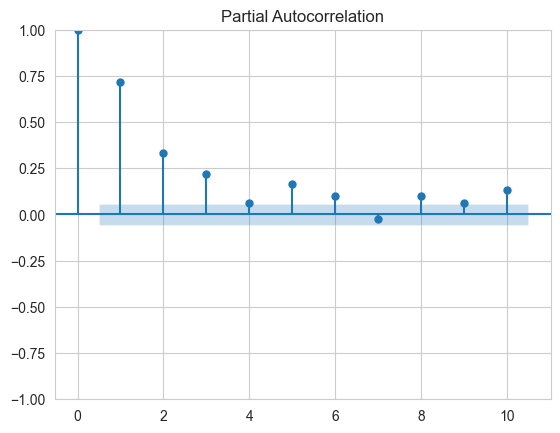

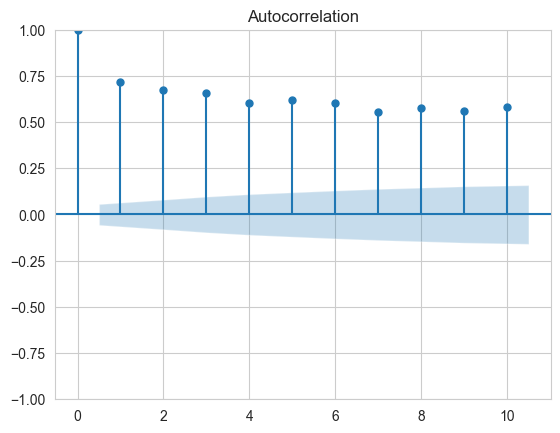

In [53]:
plt.figure(figsize=(5,8))
pacf = plot_pacf(combined['sales'],lags =10)
acf = plot_acf(combined['sales'],lags =10)

##### Stationarity Test

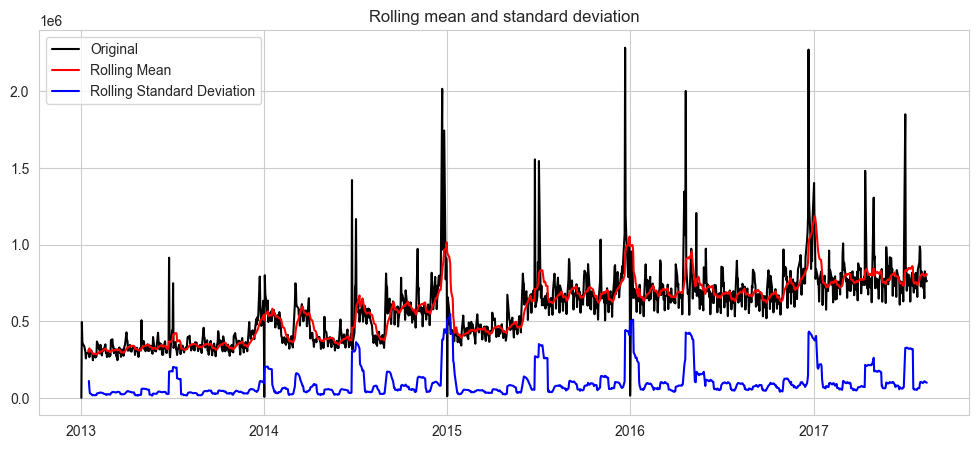

In [54]:
plt.figure(figsize=(12,5))
rmean=combined['sales'].rolling(window=12).mean()
rstd=combined['sales'].rolling(window=12).std()
# print(rmean,rstd)
orig=plt.plot(combined['sales'], color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show();

###### Comment:
From the graph above, the rolling mean and rolling standard deviation is constant, thus the dataset can be said to be stationary

###### Comment:
From the graph above, the rolling mean and rolling standard deviation is constant, thus the dataset can be said to be stationary

In [55]:
model1 =AutoReg(train_data, lags=5).fit()
model1.summary()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  sales   No. Observations:                  865
Model:                     AutoReg(5)   Log Likelihood              -11421.922
Method:               Conditional MLE   S.D. of innovations         141827.359
Date:                Sun, 04 Aug 2024   AIC                          22857.843
Time:                        13:42:59   BIC                          22891.142
Sample:                             5   HQIC                         22870.591
                                  865                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.055e+04   1.47e+04      4.815      0.000    4.18e+04    9.93e+04
sales.L1       0.3561      0.034     10.529      0.000       0.290       0.422
sales.L2       0.1794      0.036      4.990      0.000       0.109       0.250
sales.L3       0.2030      0.036      5.670      0.000       0.133       0.273
sales.L4      -0.0029      0.036     -0.080      0.936      -0.073       0.068
sales.L5       0.1292      0.034      3.820      0.000       0.063       0.195
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0645           -0.0000j            1.0645           -0.0000
AR.2           -1.1328           -1.0206j            1.5248           -0.3833
AR.3           -1.1328           +1.0206j            1.5248            0.3833
AR.4            0.6117           -1.6595j            1.7686           -0.1938
AR.5            0.6117           +1.6595j            1.7686            0.1938
-----------------------------------------------------------------------------
"""

In [56]:
Ar_pred = model1.predict(start =len(train_data),
                       end = len(train_data) +len(test_data)-1,
                       dynamic =False)

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


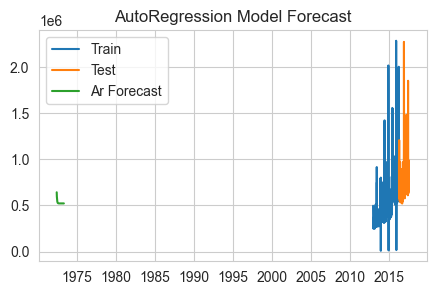

In [57]:
plt.figure(figsize=(5,3))
plt.plot(train_data['sales'], label ='Train')
plt.plot(test_data['sales'], label ='Test')
plt.plot(Ar_pred, label ='Ar Forecast')
plt.legend(loc='best')
plt.title('AutoRegression Model Forecast')
plt.show;

##### Evaluation

In [58]:
ar_mse = mean_squared_error(test_data,Ar_pred)
ar_msle = mean_squared_log_error(test_data, Ar_pred)
ar_rmse =np.sqrt(ar_mse).round(2)
ar_rmsle =np.sqrt(ar_msle).round(2)

In [59]:
results =pd.DataFrame([['AR',ar_mse, ar_msle,ar_rmse,ar_rmsle]], columns =['Model','mse','msle','rmse','rmsle'])

results

,Model,mse,msle,rmse,rmsle
0,AR,"80,161,930,466.119",0.151,"283,128.820",0.390


#### ARIMA

In [60]:
stepwise_fit = auto_arima(train_data['sales'], trace =True,suppress_warning =True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22960.436, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23272.544, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23090.234, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22970.159, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23270.546, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22961.582, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22959.936, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22965.114, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23009.508, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22947.316, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23005.100, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22948.100, Time=0.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22947.859, Time=0.69 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=22983.974, Time=0.10 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  865
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -11448.395
Date:                Sun, 04 Aug 2024   AIC                          22914.790
Time:                        13:43:18   BIC                          22957.644
Sample:                             0   HQIC                         22931.193
                                - 865                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3150      0.064    -20.491      0.000      -1.441      -1.189
ar.L2         -0.1923      0.061     -3.141      0.002      -0.312      -0.072
ar.L3          0.6459      0.066      9.830      0.000       0.517       0.775
ar.L4          0.3328      0.050      6.718      0.000       0.236       0.430
ar.L5          0.0285      0.033      0.863      0.388      -0.036       0.093
ma.L1          0.6773      0.062     10.855      0.000       0.555       0.800
ma.L2         -0.7324      0.035    -21.191      0.000      -0.800      -0.665
ma.L3         -0.8155      0.066    -12.265      0.000      -0.946      -0.685
sigma2      1.993e+10   1.59e-11   1.26e+21      0.000    1.99e+10    1.99e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             44295.32
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               4.75   Skew:                             3.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.24e+35. Standard errors may be unstable.
"""

In [61]:
model2 = ARIMA(train_data, order=(4,1,3))
model_fit = model2.fit()
model_fit.summary()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  865
Model:                 ARIMA(4, 1, 3)   Log Likelihood              -11455.990
Date:                Sun, 04 Aug 2024   AIC                          22927.980
Time:                        13:43:20   BIC                          22966.073
Sample:                             0   HQIC                         22942.561
                                - 865                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1244      0.078    -14.412      0.000      -1.277      -0.972
ar.L2         -0.0324      0.060     -0.542      0.588      -0.150       0.085
ar.L3          0.6446      0.052     12.465      0.000       0.543       0.746
ar.L4          0.3386      0.025     13.391      0.000       0.289       0.388
ma.L1          0.4497      0.079      5.698      0.000       0.295       0.604
ma.L2         -0.7819      0.066    -11.882      0.000      -0.911      -0.653
ma.L3         -0.6263      0.066     -9.467      0.000      -0.756      -0.497
sigma2      2.027e+10   9.75e-12   2.08e+21      0.000    2.03e+10    2.03e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):             42710.08
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               4.80   Skew:                             3.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.05e+36. Standard errors may be unstable.
"""

##### Prediction

In [62]:
Arima_pred = model_fit.predict(start =len(train_data),
                       end = len(train_data) +len(test_data)-1,
                       typ ='levels')

print(Arima_pred)

865    582,627.764
866    735,850.053
867    644,217.756
868    717,001.120
869    694,208.468
           ...    
1197   723,979.294
1198   723,979.294
1199   723,979.294
1200   723,979.294
1201   723,979.294
Name: predicted_mean, Length: 337, dtype: float64


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


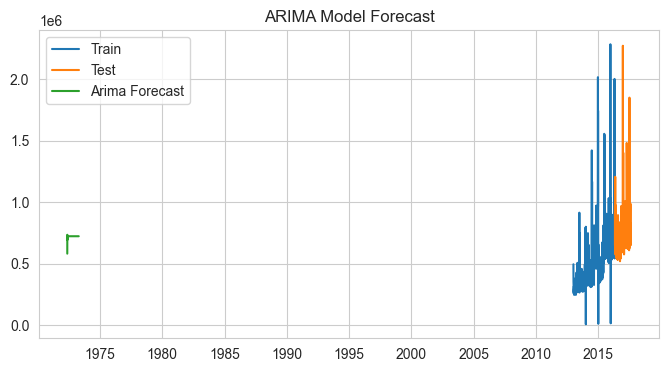

In [63]:
plt.figure(figsize=(8,4))
plt.plot(train_data['sales'], label ='Train')
plt.plot(test_data['sales'], label ='Test')
plt.plot(Arima_pred, label ='Arima Forecast')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast')
plt.show();

##### Evaluation

In [64]:
arima_mse = mean_squared_error(test_data,Arima_pred)
arima_msle = mean_squared_log_error(test_data, Arima_pred)
arima_rmse =np.sqrt(arima_mse).round(2)
arima_rmsle =np.sqrt(arima_msle).round(2)

results1 =pd.DataFrame([['ARIMA',arima_mse, arima_msle,arima_rmse,arima_rmsle]], columns =['Model','mse','msle','rmse','rmsle'])

#results = results.append(results1,ignore_index =True)
results = pd.concat([results, results1], ignore_index=True)

results

,Model,mse,msle,rmse,rmsle
0,AR,"80,161,930,466.119",0.151,"283,128.820",0.390
1,ARIMA,"28,271,622,511.880",0.032,"168,141.670",0.180


##### Comment:

The ARIMA model performs better than the AR model

#### Multivariate Forecasting with Sales as dependent variable

In [65]:
X_train

,store_nbr,family_0,family_1,family_2,family_3,family_4,family_5,onpromotion,transactions,holiday_type_0,...,year,month,is_month_start,is_month_end,day,is_weekend,day_of_the_year,quarter,is_quarter_start,is_quarter_end
2029343,0.545,0,0,1,0,0,1,16.000,-0.572,0,...,1.610,-0.184,-0.182,-0.182,0.834,-1.445,-1.461,-1.290,-0.112,-0.112
149442,-1.572,0,1,0,0,1,1,2.000,4.764,0,...,0.122,-0.184,-0.182,-0.182,0.948,1.807,1.782,1.446,-0.112,-0.112
606595,-1.059,0,1,0,1,1,1,0.000,0.543,1,...,0.866,-0.184,-0.182,-0.182,-0.643,-0.428,-0.416,-0.378,-0.112,-0.112
3035371,1.700,1,0,0,0,0,0,0.000,-0.795,0,...,0.866,5.434,-0.182,-0.182,-1.665,-1.377,-1.374,-1.290,-0.112,-0.112
2188364,0.738,0,0,0,0,1,1,0.000,-0.448,0,...,0.866,-0.184,-0.182,-0.182,0.039,-0.970,-0.948,-1.290,-0.112,-0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811939,1.444,0,0,1,0,1,0,1.000,0.466,1,...,0.866,-0.184,-0.182,-0.182,1.175,-0.564,-0.551,-0.378,-0.112,-0.112
2203837,0.738,1,0,0,0,0,0,0.000,-0.299,0,...,1.610,-0.184,-0.182,-0.182,0.039,-0.090,-0.067,-0.378,-0.112,-0.112
1027761,-0.545,0,0,1,0,1,0,0.000,-0.533,0,...,-1.366,-0.184,-0.182,-0.182,0.039,1.130,1.114,1.446,-0.112,-0.112
154653,-1.572,0,1,0,0,0,0,0.000,1.316,0,...,0.866,-0.184,-0.182,-0.182,1.175,-0.293,-0.261,-0.378,-0.112,-0.112


#### Linear Model

In [66]:
# Linear Regression Model

lr = LinearRegression()
model = lr.fit(X_train, y_train)

# Make prediction on X_test
lr_predictions = lr.predict(X_test)

In [67]:
# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse).round(2)

# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and lr_predictions_abs array
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)

# Print the evaluation results for Linear Regression model
print("\nEvaluation Results for Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("RMSLE:", lr_rmsle)


Evaluation Results for Linear Regression:
MSE: 0.7
RMSE: 0.84
RMSLE: 0.27


In [68]:
from sklearn.metrics import mean_squared_error

# predict on test set
y_pred = model.predict(X_test)

# calculate MSE
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.70


#### Decision Tree Regression Model

In [69]:
# Decision Tree Regression Model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make prediction on X_test
dt_predictions = dt.predict(X_test)

# Evaluation Metrics for Decision Tree Regression
dt_mse = mean_squared_error(y_test, dt_predictions).round(2)
dt_rmse = np.sqrt(dt_mse).round(2)

# Evaluation Metrics for Decision Tree Regression
dt_predictions_abs = abs(dt_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and dt_predictions_abs array
dt_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dt_predictions_abs)).round(2)

# Print the evaluation results for Decision Tree Regression model
print("\nEvaluation Results for Decision Tree Regression:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)

print("RMLSE:", dt_rmsle)


Evaluation Results for Decision Tree Regression:
MSE: 0.17
RMSE: 0.41
RMLSE: 0.1


#### XGBoost Model

In [70]:
# create an instance of the XGBRegressor class
xgb_model = xgb.XGBRegressor()

# fit the model on the training data
xgb_model.fit(X_train, y_train)

# make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

In [71]:
# Evaluation Metrics for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions).round(2)
xgb_rmse = np.sqrt(xgb_mse).round(2)

#y_test_abs = abs(y_test)
xgb_predictions_abs = abs(xgb_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and xgb_predictions_abs array
xgb_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, xgb_predictions_abs)).round(2)

# Print the evaluation results for XGBoost model
print("\nEvaluation Results for XGBoost:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("RMSLE:", xgb_rmsle)


Evaluation Results for XGBoost:
MSE: 0.16
RMSE: 0.4
RMSLE: 0.12


#### Random Forest Regression Model

In [72]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

# Make prediction on X_test
rf_predictions = rf.predict(X_test)

In [73]:
# Evaluation Metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions).round(2)
rf_rmse = np.sqrt(rf_mse).round(2)

# apply the absolute value function to y_test to remove negative signs
rf_predictions_abs = abs(rf_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and rf_predictions_abs array
rf_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

# Print the evaluation results for Random Forest Regrression model
print("\nEvaluation Results for Random Forest:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("RMSLE:", rf_rmsle)
                                          


Evaluation Results for Random Forest:
MSE: 0.13
RMSE: 0.36
RMSLE: 0.09


### Evaluation

In [74]:
# Define a table to compare evaluation results
evaluation_metrics = ['MSE', 'RMSE', 'RMSLE']
models = ['AR','ARIMA','Linear Regression', 'Decision Tree', 'XGBoost', 'Random Forest']
results = [[ar_mse,ar_rmse,ar_rmsle],
           [arima_mse,arima_rmse,arima_rmsle],
           [lr_mse, lr_rmse, lr_rmsle],
           [dt_mse, dt_rmse, dt_rmsle],
           [xgb_mse, xgb_rmse, xgb_rmsle],
           [rf_mse, rf_rmse, rf_rmsle]]
results_table = pd.DataFrame(data=results, columns=evaluation_metrics, index=models)

# Print the comparison table
print("Comparison Table of Evaluation Results:\n", results_table)
results_table


Comparison Table of Evaluation Results:
                                  MSE        RMSE  RMSLE
AR                80,161,930,466.119 283,128.820  0.390
ARIMA             28,271,622,511.880 168,141.670  0.180
Linear Regression              0.700       0.840  0.270
Decision Tree                  0.170       0.410  0.100
XGBoost                        0.160       0.400  0.120
Random Forest                  0.130       0.360  0.090


,MSE,RMSE,RMSLE
AR,"80,161,930,466.119","283,128.820",0.390
ARIMA,"28,271,622,511.880","168,141.670",0.180
Linear Regression,0.700,0.840,0.270
Decision Tree,0.170,0.410,0.100
XGBoost,0.160,0.400,0.120
Random Forest,0.130,0.360,0.090
